# Capstone 3 Wine Quality 

## Objective

The overall objective of this project is to build a high precision classification model that can predict wine taste preferences based on physiochemical attributes. Such a model could be useful in many applications such as aiding in the training of wine sommeliers or improving wine production. It will also be interesting to see which pyshiochemical attributes contribute most to the quality scores.

## Data

These datasets were found on the UCI Machine Learning Website (https://archive.ics.uci.edu/ml/datasets/Wine+Quality). 

Source: Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal
@2009

The quality scores within the datasets were given by professional wine sommeliers. The wines evaluated are variants of the Portuguese Vinho Verde wines. Due to privacy and logistic issues, the dataset only contains physiochemical statistics for each of the wines. Brand names and prices are not given. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
import statsmodels.api as sm
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import normalize
%matplotlib inline
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict

import warnings
warnings.filterwarnings('ignore')

In [2]:
red_wine = pd.read_csv(r'C:\Users\kylem\Desktop\Thinkful Data Science Projects\winequality-red.csv', sep =';')
white_wine = pd.read_csv(r'C:\Users\kylem\Desktop\Thinkful Data Science Projects\winequality-white.csv', sep =';')

In [3]:
red_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
white_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [6]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
#missing value evaluation
total_missing = red_wine.isnull().sum().sort_values(ascending=False)
percent_missing = (red_wine.isnull().sum()/red_wine.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total  Percent
quality                   0      0.0
alcohol                   0      0.0
sulphates                 0      0.0
pH                        0      0.0
density                   0      0.0
total sulfur dioxide      0      0.0
free sulfur dioxide       0      0.0
chlorides                 0      0.0
residual sugar            0      0.0
citric acid               0      0.0
volatile acidity          0      0.0
fixed acidity             0      0.0

In [8]:
#missing value evaluation
total_missing = white_wine.isnull().sum().sort_values(ascending=False)
percent_missing = (white_wine.isnull().sum()/white_wine.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total  Percent
quality                   0      0.0
alcohol                   0      0.0
sulphates                 0      0.0
pH                        0      0.0
density                   0      0.0
total sulfur dioxide      0      0.0
free sulfur dioxide       0      0.0
chlorides                 0      0.0
residual sugar            0      0.0
citric acid               0      0.0
volatile acidity          0      0.0
fixed acidity             0      0.0

### Feature Summary

- Alcohol - percent alcohol by volume
- Sulphates - grams pottasium sulphate per cubic decimeter
- pH - ranges from 0-14, measures the amount of hydrogen/hydroxyl ions present in water
- Density - grams per milliliter, density is commonly associated with mouthfeel in beverages
- Total Sulfur Dioxide - milligrams per cubic decimeter, the amount of free plus bound sulfur dioxide present in wine
- Free Sulfur Dioxide - milligrams per cubic decimeter, the amount of unbound sulfur dioxide, prevents oxidation/microbial growth
- Chlorides - grams of sodium chloride (salt) per cubic decimter
- Residual Sugar - grams per cubic decimeter, the sugar left over after fermentation ends
- Citric Acid - grams per cubic decimeter, citric acid is present in small amounts in wine. Citric acid can enhance freshness of wine and enhance certain flavors such as fruity notes.
- Volatile Acidity - grams acetic acid per cubic decimeter, acetic acid is a byproduct of fermentation and at high levels it can give an off, vinegar like flavor
- Fixed Acidity - grams tartaric acid per cubic decimeter, most acids present in wine are fixed. These are acids that are not easily evaporated.

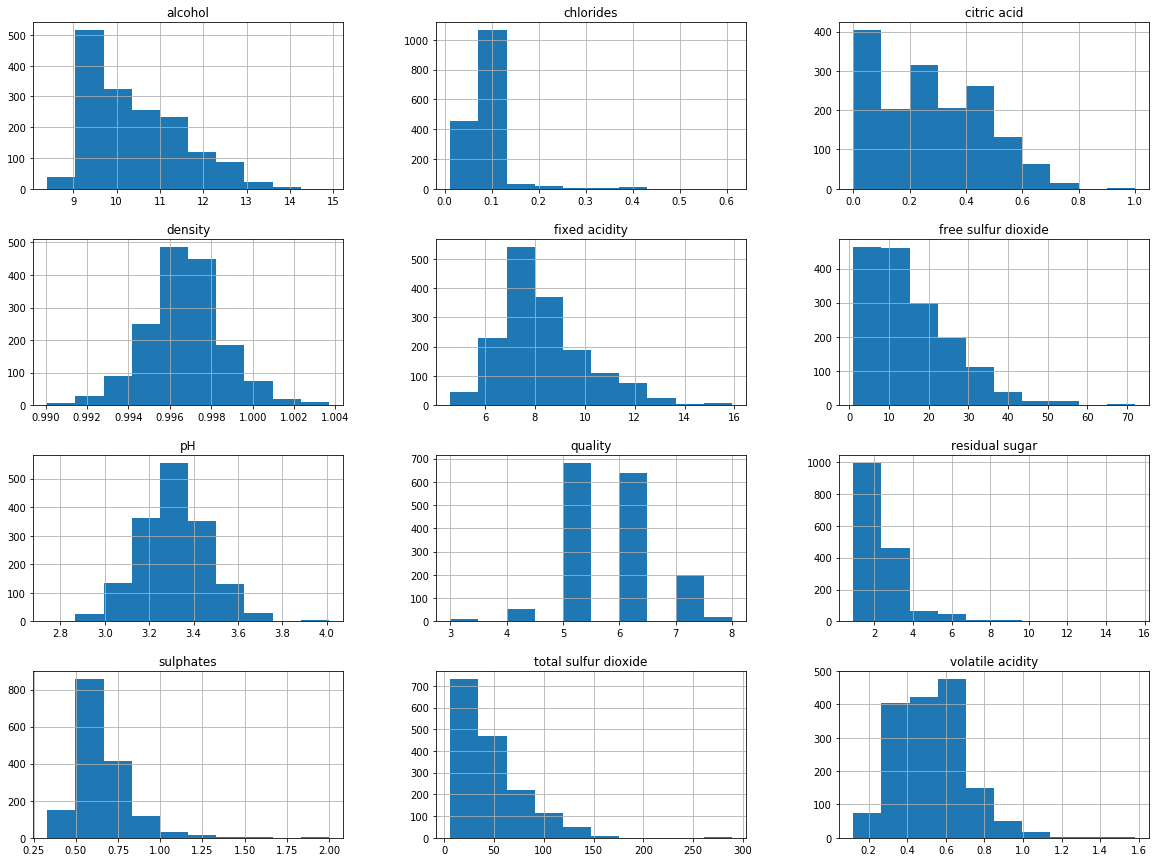

In [9]:
#evaluate data distributions
red_wine.hist(figsize=(20,15))
plt.show()

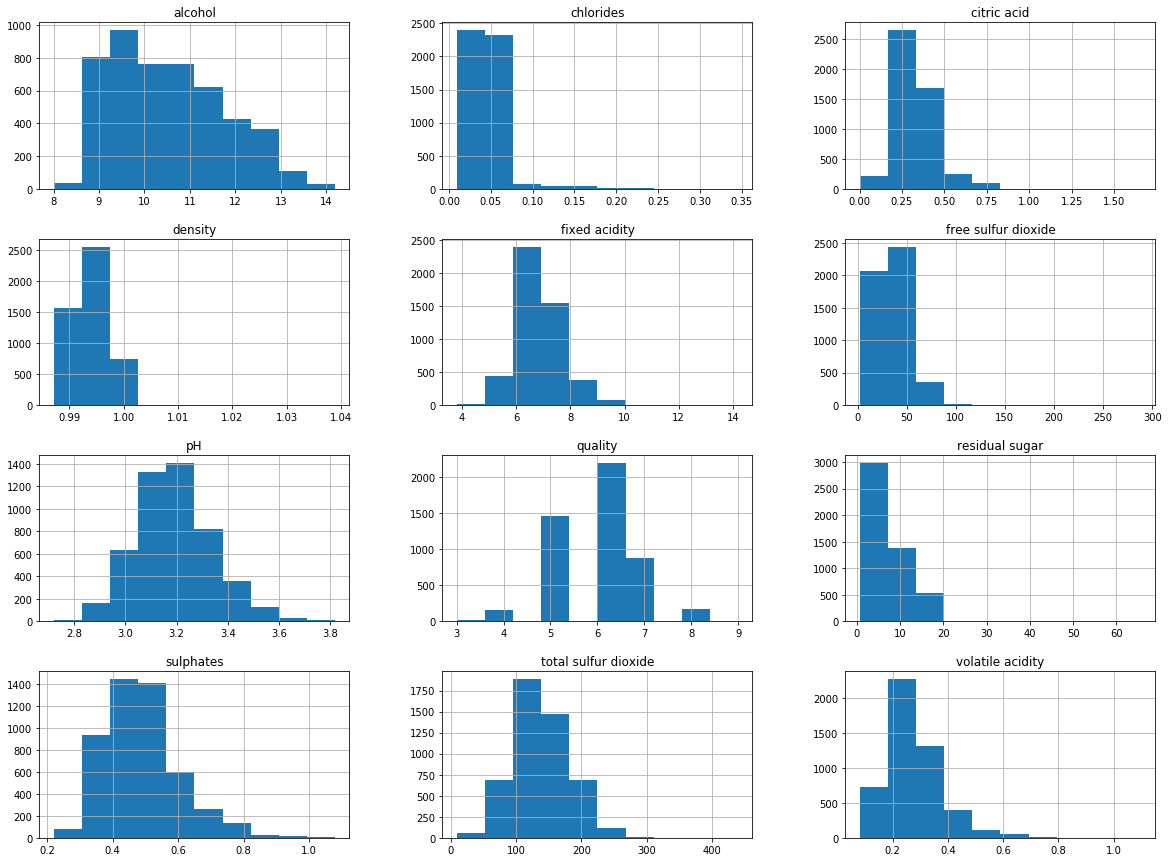

In [10]:
#evaluate data distribution
white_wine.hist(figsize=(20,15))
plt.show()

In [11]:
#what is the quality scale?
print(red_wine['quality'].unique())
print(white_wine['quality'].unique())

[5 6 7 4 8 3]
[6 5 7 8 4 3 9]


Sensory scores range from 3 to 8 or 9 depending on the type of wine. Speaking of types of wine, let's combine the red and white wine datasets into one.

In [12]:
#add type column to each dataframe
red_wine['type'] = 'red'
white_wine['type'] = 'white'

In [13]:
#combine the data into one dataset
combined_data = [red_wine, white_wine]
wine = pd.concat(combined_data)

In [14]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2      9.8        5  red  
3      9.8        6  red  
4      9.4        5  red

In [15]:
red_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [16]:
white_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [17]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

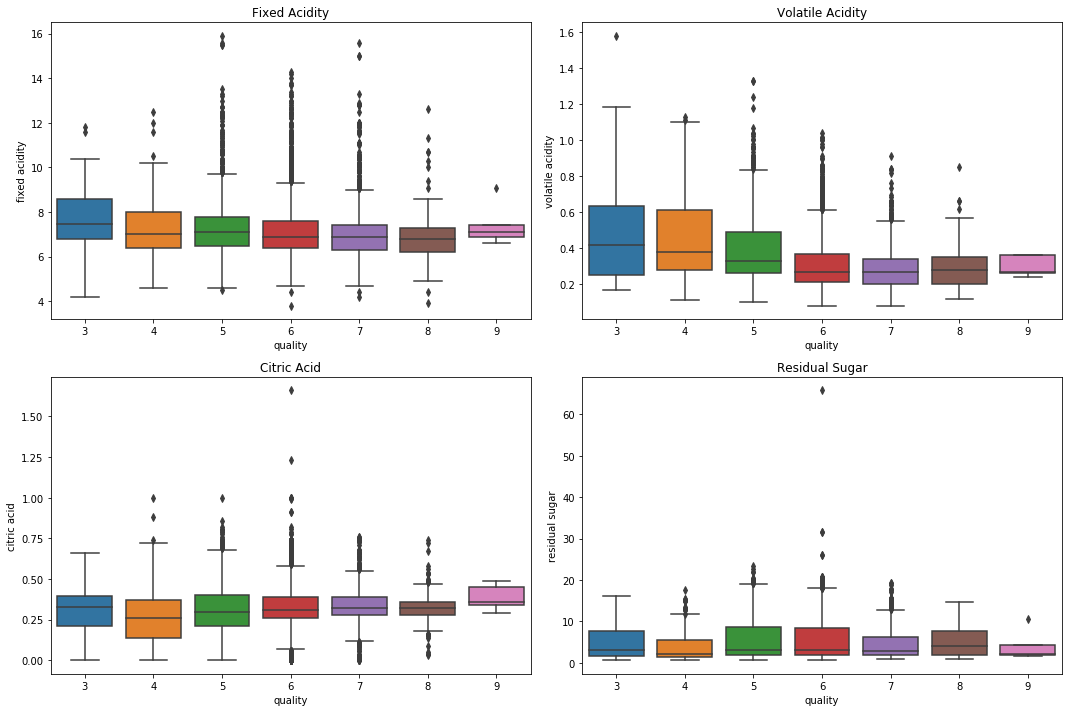

In [18]:
#lets take a closer look at the data
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot('quality', 'fixed acidity', data=wine)
plt.title('Fixed Acidity')

plt.subplot(2,2,2)
sns.boxplot('quality', 'volatile acidity', data=wine)
plt.title('Volatile Acidity')

plt.subplot(2,2,3)
sns.boxplot('quality', 'citric acid', data=wine)
plt.title('Citric Acid')

plt.subplot(2,2,4)
sns.boxplot('quality', 'residual sugar', data=wine)
plt.title('Residual Sugar')

plt.tight_layout()
plt.show()

We can see a few trends here, fixed acidity and volatile acidity have a somewhat negative correlation with quality. It makes sense that wines with volatile acidity score lower as acetic acid is typically a sign of stressed fermentation. There doesn't seem to be much of a trend between residual sugar and quality but citric acid may be highest in the higher scoring wines.

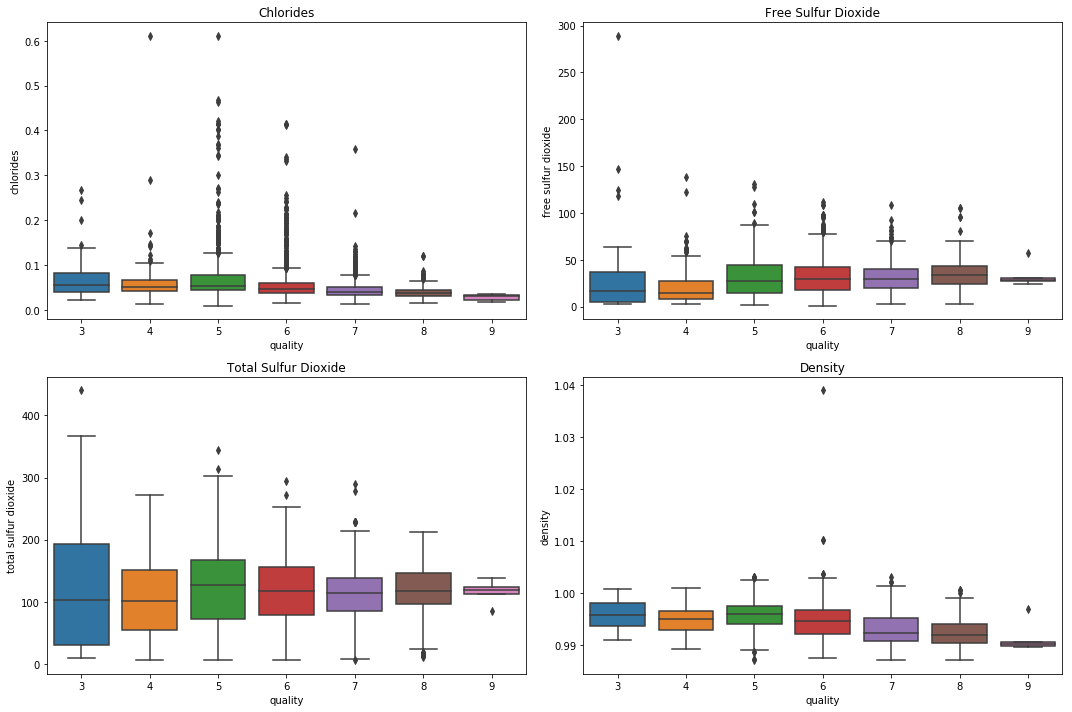

In [19]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot('quality', 'chlorides', data=wine)
plt.title('Chlorides')

plt.subplot(2,2,2)
sns.boxplot('quality', 'free sulfur dioxide', data=wine)
plt.title('Free Sulfur Dioxide')

plt.subplot(2,2,3)
sns.boxplot('quality', 'total sulfur dioxide', data=wine)
plt.title('Total Sulfur Dioxide')

plt.subplot(2,2,4)
sns.boxplot('quality', 'density', data=wine)
plt.title('Density')

plt.tight_layout()
plt.show()

Chloride content seems to be lowest among the highest scored wines while free and total sulfur dioxide don't seem to have much of a trend with quality. Density scores are lowest in the highest quality wines.

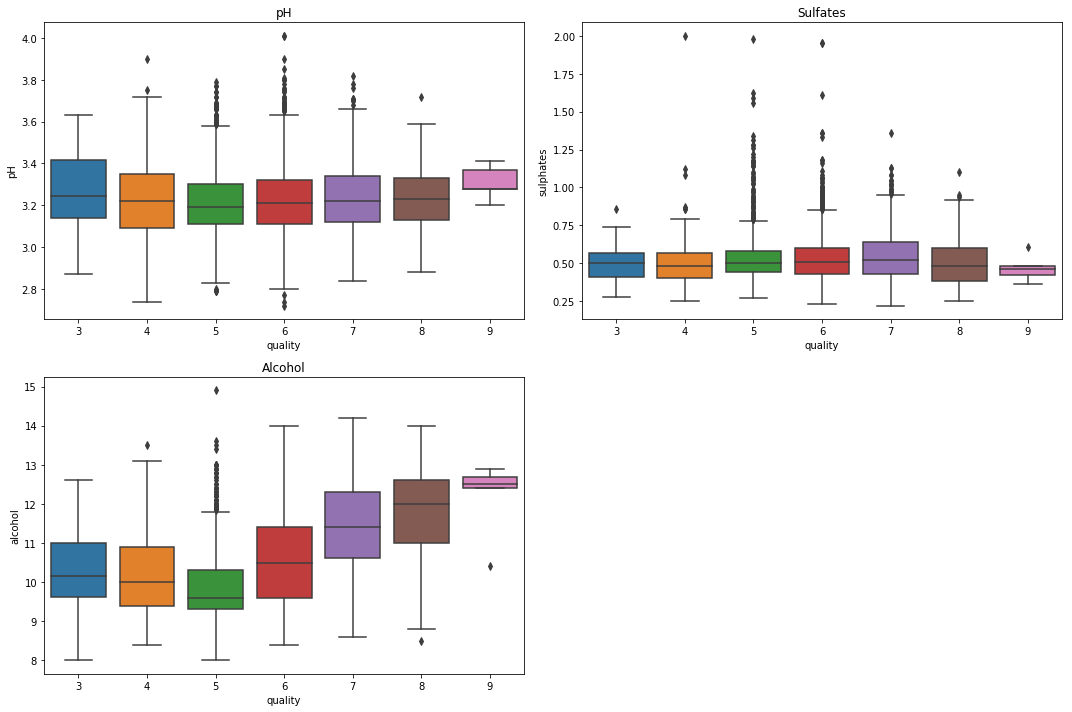

In [20]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot('quality', 'pH', data=wine)
plt.title('pH')

plt.subplot(2,2,2)
sns.boxplot('quality', 'sulphates', data=wine)
plt.title('Sulfates')

plt.subplot(2,2,3)
sns.boxplot('quality', 'alcohol', data=wine)
plt.title('Alcohol')

plt.tight_layout()
plt.show()

pH nor sulphates have much of a trend with quality, but the highest alcohol wines seem to rate the highest.

As can be seen from above, we have some outliers within the dataset. After investigating the dataset, all values are real and should remain, therefore they won't be removed. With these outliers, a robust model must be considered. 

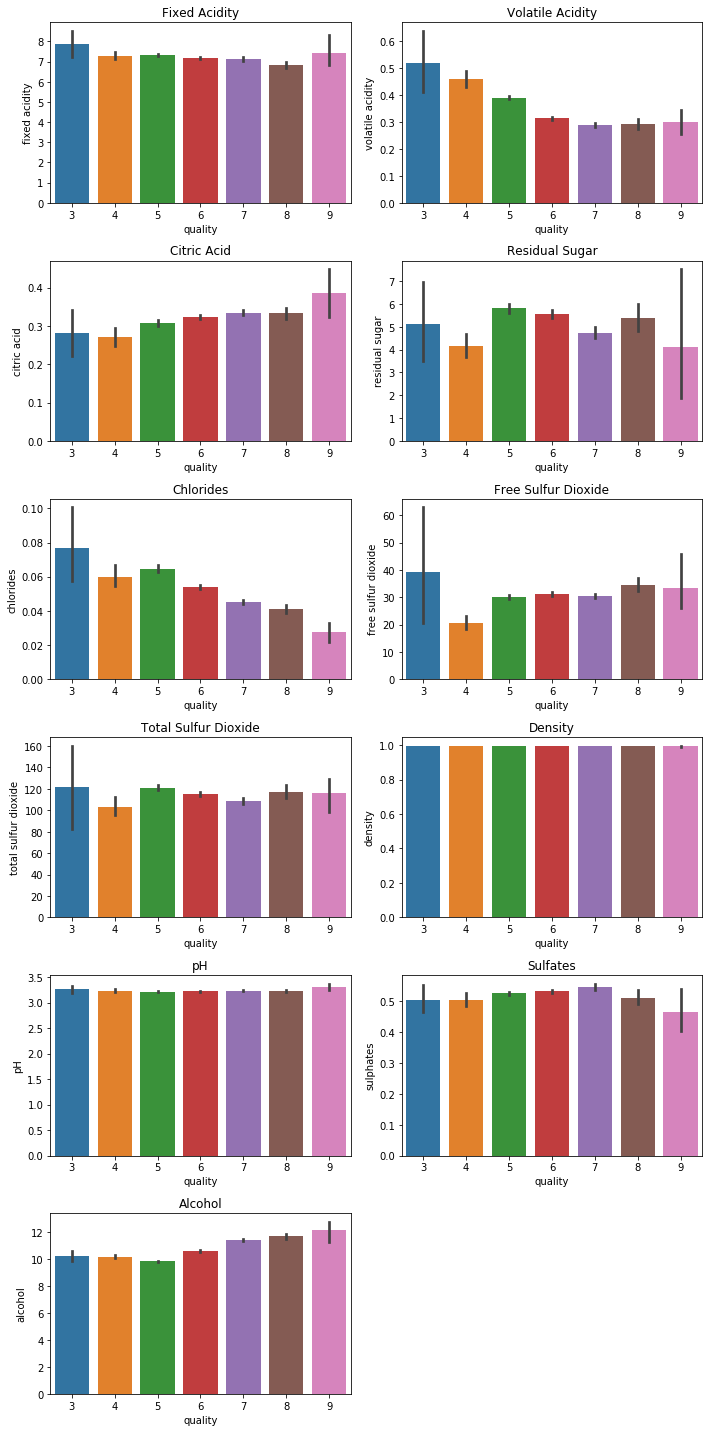

In [21]:
#let's get a different look and use barplots to spot any trends between the quality scores and features

plt.figure(figsize=(10,20))

plt.subplot(6,2,1)
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)
plt.title('Fixed Acidity')

plt.subplot(6,2,2)
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)
plt.title('Volatile Acidity')

plt.subplot(6,2,3)
sns.barplot(x = 'quality', y = 'citric acid', data = wine)
plt.title('Citric Acid')

plt.subplot(6,2,4)
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)
plt.title('Residual Sugar')

plt.subplot(6,2,5)
sns.barplot(x = 'quality', y = 'chlorides', data = wine)
plt.title('Chlorides')

plt.subplot(6,2,6)
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)
plt.title('Free Sulfur Dioxide')

plt.subplot(6,2,7)
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)
plt.title('Total Sulfur Dioxide')

plt.subplot(6,2,8)
sns.barplot(x = 'quality', y = 'density', data = wine)
plt.title('Density')

plt.subplot(6,2,9)
sns.barplot(x = 'quality', y = 'pH', data = wine)
plt.title('pH')

plt.subplot(6,2,10)
sns.barplot(x = 'quality', y = 'sulphates', data = wine)
plt.title('Sulfates')

plt.subplot(6,2,11)
sns.barplot(x = 'quality', y = 'alcohol', data = wine)
plt.title('Alcohol')



plt.tight_layout()
plt.show()

We can see a few trends from the data above. 

- Volatile acidity seems to decrease with the highest rated wines, again, this makes sense as vinegar like flavors are considered to be "off notes" in alcoholic beverages in general. 
- Citric acid seems to increase with higher scoring wines. This isn't surprising as citric acid is known to highlight fruity flavors, and make flavors in general "pop". It's considered a "magic pixie dust" in the flavor industry.
- Chlorides seems to be negatively correlated with quality. This is somewhat surprising as salt, like citric acid, is commonly used to make flavors pop.
- Alcohol seems to be positively correlated with quality scores. The more alcohol, the better the taste, at least according to this dataset. Alcohol itself doesn't lend many flavor attributes but it is the primary byproduct of the most important process in any alcoholic beverage manufacturing - fermentation.

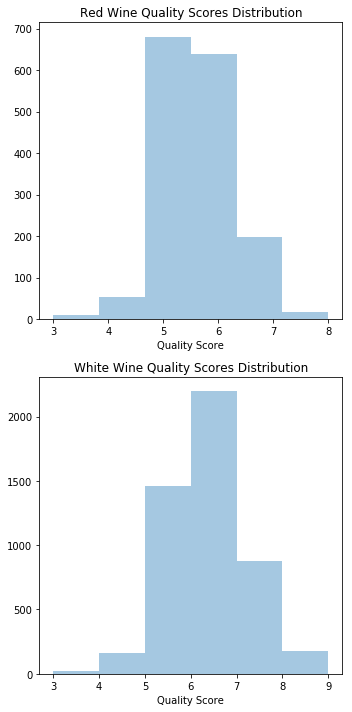

In [22]:
#target distribution
import seaborn as sns

plt.figure(figsize=(5,10))
plt.subplot(2, 1, 1)
sns.distplot(red_wine['quality'], bins=6, kde=False)
plt.title('Red Wine Quality Scores Distribution')
plt.xlabel('Quality Score')


plt.subplot(2, 1, 2)
sns.distplot(white_wine['quality'], bins=6, kde=False)
plt.title('White Wine Quality Scores Distribution')
plt.xlabel('Quality Score')

plt.tight_layout()
plt.show()

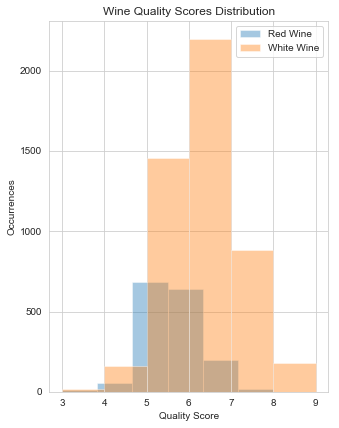

In [23]:

sns.set_style('whitegrid')
plt.figure(figsize=(5,15))
plt.subplot(2, 1, 1)
sns.distplot(red_wine['quality'], bins=6, kde=False)
sns.distplot(white_wine['quality'], bins=6, kde=False)
plt.title('Wine Quality Scores Distribution')
plt.xlabel('Quality Score')
plt.ylabel('Occurrences')
plt.legend(['Red Wine', 'White Wine'])

plt.show()

As one would expect, most wines are just 'meh'. Humans, even professionals, tend to score their beverages inside of the extremes. In wine tasting, scores range from 0 to 10, with 10 being an excellent, world class wine and 0 being terrible. No wine in this entire dataset scored a 0 or a 10.

---

### Target Classification

Lets create two quality classes of wine - high and low. We'll set the score to anything above 6.5 is a high quality wine while anything below is a low quality wine. This is how we will classify our target variable.

In [24]:
quality_class = []
for i in wine['quality']:
    if i >= 1 and i <= 6.5:
        quality_class.append(0)
    elif i > 6.5 and i <= 10:
        quality_class.append(1)
wine['quality_class'] = quality_class

In [25]:
type = []
for i in wine['type']:
    if i == 'red':
        type.append(0)
    elif i == 'white':
        type.append(1)
wine['type'] = type

In [26]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  quality_class  
0      9.4        5     0              0  
1      9.8        5     0              0  
2      9.8        5     0              0  
3      9.8        6     0              0  
4      9.4        5     0              0

In [27]:
#assign our variables

y = wine['quality_class']
X = wine[['alcohol', 'citric acid', 'sulphates', 'pH', 'free sulfur dioxide', 'fixed acidity', 
                    'total sulfur dioxide', 'residual sugar', 'volatile acidity', 'chlorides', 'density','type']]

In [28]:
X

alcohol  citric acid  sulphates    pH  free sulfur dioxide  \
0      9.400000         0.00       0.56  3.51                 11.0   
1      9.800000         0.00       0.68  3.20                 25.0   
2      9.800000         0.04       0.65  3.26                 15.0   
3      9.800000         0.56       0.58  3.16                 17.0   
4      9.400000         0.00       0.56  3.51                 11.0   
5      9.400000         0.00       0.56  3.51                 13.0   
6      9.400000         0.06       0.46  3.30                 15.0   
7     10.000000         0.00       0.47  3.39                 15.0   
8      9.500000         0.02       0.57  3.36                  9.0   
9     10.500000         0.36       0.80  3.35                 17.0   
10     9.200000         0.08       0.54  3.28                 15.0   
11    10.500000         0.36       0.80  3.35                 17.0   
12     9.900000         0.00       0.52  3.58                 16.0   
13     9.100000         0.29       1.56  3.26                  9.0   
14     9.200000         0.18       0.88  3.16                 52.0   
15     9.200000         0.19       0.93  3.17                 51.0   
16    10.500000         0.56       0.75  3.30                 35.0   
17     9.300000         0.28       1.28  3.11                 16.0   
18     9.000000         0.08       0.50  3.38                  6.0   
19     9.200000         0.51       1.08  3.04                 17.0   
20     9.400000         0.48       0.53  3.39                 29.0   
21     9.700000         0.31       0.65  3.52                 23.0   
22     9.500000         0.21       0.91  3.17                 10.0   
23     9.400000         0.11       0.53  3.17                  9.0   
24     9.700000         0.14       0.63  3.43                 21.0   
25     9.300000         0.16       0.56  3.34                 11.0   
26     9.500000         0.24       0.59  3.28                  4.0   
27     9.500000         0.21       0.91  3.17                 10.0   
28     9.400000         0.00       0.55  3.47                 14.0   
29     9.800000         0.00       0.59  3.38                  8.0   
...         ...          ...        ...   ...                  ...   
4868  10.800000         0.31       0.64  3.31                 42.0   
4869   9.800000         0.33       0.51  3.19                  8.0   
4870  11.450000         0.28       0.36  3.15                 29.0   
4871  12.050000         0.40       0.55  3.37                 20.0   
4872   9.700000         0.41       0.60  3.14                 50.0   
4873  11.900000         0.32       0.52  3.33                 33.0   
4874  10.000000         0.36       0.49  3.49                 16.0   
4875   9.700000         0.26       0.41  3.12                 18.0   
4876  11.600000         0.42       0.59  3.36                 34.0   
4877   8.800000         0.00       0.36  3.25                 12.0   
4878   9.500000         0.02       0.35  3.24                  6.0   
4879   9.533333         0.40       0.50  3.15                 68.0   
4880   9.533333         0.40       0.50  3.15                 68.0   
4881   9.400000         0.27       0.50  3.07                 34.0   
4882  10.700000         0.13       0.38  3.26                 45.0   
4883  11.500000         0.17       0.35  3.27                 60.0   
4884   9.600000         0.38       0.50  3.14                 68.0   
4885   9.550000         0.40       0.50  3.15                 68.0   
4886  12.150000         0.28       1.08  3.21                 45.0   
4887  13.000000         0.22       0.79  3.04                  5.0   
4888   9.200000         0.36       0.54  3.04                 38.0   
4889   9.400000         0.27       0.50  3.07                 34.0   
4890  11.800000         0.29       0.44  3.06                 25.0   
4891  10.600000         0.32       0.46  3.24                 38.0   
4892   9.700000         0.38       0.54  3.29                 29.0   
4893  11.200000   

In [29]:
#split the set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=13)

In [30]:
#target variable counts
wine['quality_class'].value_counts()

0    5220
1    1277
Name: quality_class, dtype: int64

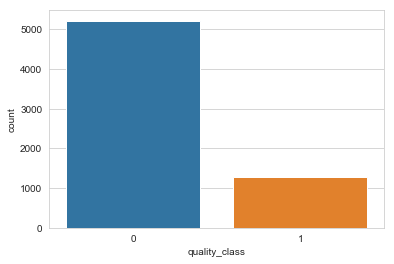

In [31]:
#target variable visualization
sns.countplot(wine['quality_class'])

We have a class imbalance here, but it isn't horrendous. This will be dealt with in our models with the class weight parameter.

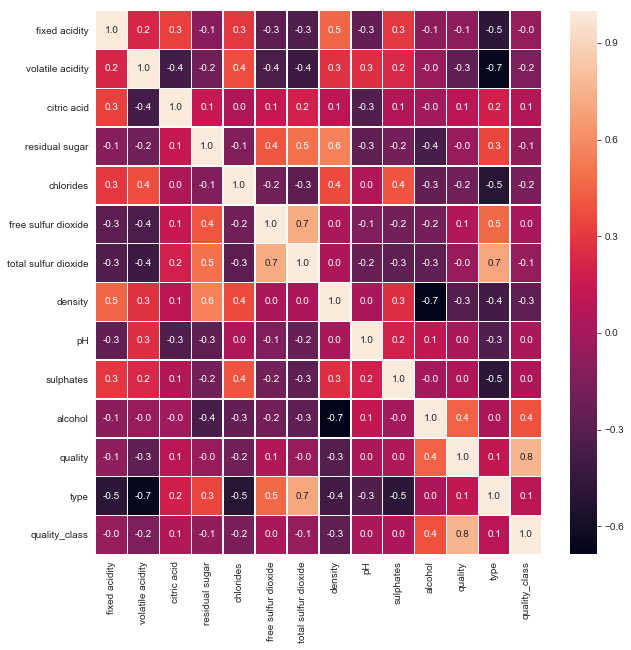

In [32]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(wine.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

The features we would expect to be correlated are indeed correlated. 

- Density and Alcohol
- Density and Residual Sugar
- Fixed Acidity and Density
- Free Sulfur Dioxide and Total Sulfur Dioxide
- Total Sulfur Dioxide and Residual Sugar - wasn't expecting this to be correlated

## Play with the Models

### Preprocess Pipeline

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [34]:
#use standard scaler as part of the numeric pipeline
#tried using PCA on the dataset but it decreased overall scores across all models

from imblearn.pipeline import Pipeline
num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(['alcohol', 'citric acid', 'sulphates', 'pH', 'free sulfur dioxide', 'fixed acidity', 
                    'total sulfur dioxide', 'residual sugar', 'volatile acidity', 'chlorides', 'density'])),
        ('scale', StandardScaler())])

In [35]:
#one hote encode the type feature
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(['type'])),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [36]:
#combine the pipelines
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [37]:
#fit pipeline to the training data
X_train = preprocess_pipeline.fit_transform(X_train)

---

# Build The Models

In [156]:
#lets start with the simplest models first

from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report

bnb = BernoulliNB()
bnb.fit(X_train, y_train)


y_train_predbnb = bnb.predict(X_train)
print('Accuracy Score: \n' ,metrics.accuracy_score(y_train, y_train_predbnb))
print('Confusion Matrix: \n' ,confusion_matrix(y_train, y_train_predbnb))
print('Cross Validation Score: \n' ,cross_val_score(bnb, X_train, y_train, cv=10, scoring='accuracy'))
print('Classification Report: \n' ,classification_report(y_train, y_train_predbnb))

Accuracy Score: 
 0.7389487574224763
Confusion Matrix: 
 [[2896  775]
 [ 412  464]]
Cross Validation Score: 
 [0.76703297 0.73406593 0.76263736 0.72087912 0.72307692 0.76703297
 0.71208791 0.72026432 0.74669604 0.73348018]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      3671
           1       0.37      0.53      0.44       876

    accuracy                           0.74      4547
   macro avg       0.62      0.66      0.63      4547
weighted avg       0.78      0.74      0.75      4547



In [157]:
print("Number of mislabeled points out of a total {} points : {}".format(
    X_train.shape[0],
    (y_train != y_train_predbnb).sum()
))

Number of mislabeled points out of a total 4547 points : 1187


Oof... this doesn't get us anywhere. 

---

### Logistic Regression

In [158]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression(class_weight='balanced', random_state=13)

log_r.fit(X_train, y_train)

y_train_predlog = cross_val_predict(log_r, X_train, y_train, cv=10)
print('Accuracy Score: \n' ,metrics.accuracy_score(y_train, y_train_predlog))
print('Confusion Matrix: \n' ,confusion_matrix(y_train, y_train_predlog))
print('Cross Validation Score: \n' ,cross_val_score(log_r, X_train, y_train, cv=10, scoring='accuracy'))
print('Classification Report: \n' ,classification_report(y_train, y_train_predlog))

Accuracy Score: 
 0.7206949637123378
Confusion Matrix: 
 [[2609 1062]
 [ 208  668]]
Cross Validation Score: 
 [0.71648352 0.74285714 0.73406593 0.70549451 0.7010989  0.74285714
 0.69230769 0.7246696  0.72026432 0.72687225]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.71      0.80      3671
           1       0.39      0.76      0.51       876

    accuracy                           0.72      4547
   macro avg       0.66      0.74      0.66      4547
weighted avg       0.82      0.72      0.75      4547



Precision improved slightly but not by much. Perhaps some more complex models will yield better results. 

In [159]:
y_scoreslog_r = cross_val_predict(log_r, X_train, y_train, cv=10, method='decision_function')

In [160]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scoreslog_r)

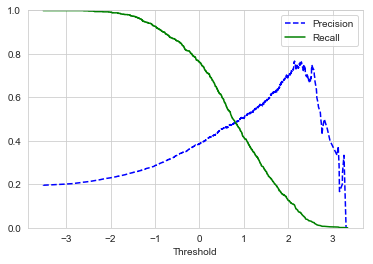

In [161]:
def precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend()
    plt.ylim([0,1])
precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

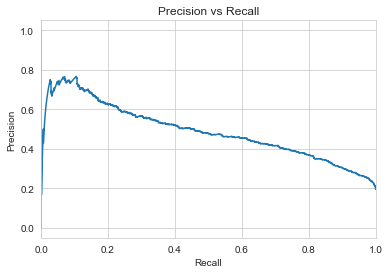

In [162]:
def precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision vs Recall')
    plt.margins(x=0)
    
precision_vs_recall(precisions, recalls)
plt.show()

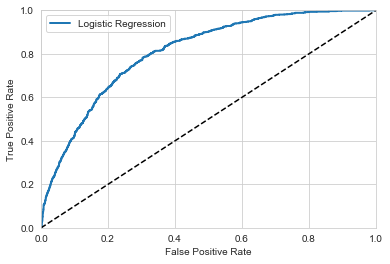

In [163]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y_train, y_scoreslog_r)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr1, tpr1, 'Logistic Regression')
plt.legend()
plt.show()

In [164]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scoreslog_r)

0.8085534654561422

### Support Vector Machines

In [165]:
#try a linear model first
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

svclin_clf = LinearSVC(class_weight = 'balanced', random_state=13)

svclin_clf.fit(X_train, y_train)

y_train_pred = cross_val_predict(svclin_clf, X_train, y_train, cv=10)
print('Accuracy Score: \n' ,metrics.accuracy_score(y_train, y_train_pred))
print('Confusion Matrix: \n' ,confusion_matrix(y_train, y_train_pred))
print('Cross Validation Score: \n' ,cross_val_score(log_r, X_train, y_train, cv=10, scoring='accuracy'))
print('Classification Report: \n' ,classification_report(y_train, y_train_pred))

Accuracy Score: 
 0.7220145150648779
Confusion Matrix: 
 [[2607 1064]
 [ 200  676]]
Cross Validation Score: 
 [0.71648352 0.74285714 0.73406593 0.70549451 0.7010989  0.74285714
 0.69230769 0.7246696  0.72026432 0.72687225]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.71      0.80      3671
           1       0.39      0.77      0.52       876

    accuracy                           0.72      4547
   macro avg       0.66      0.74      0.66      4547
weighted avg       0.82      0.72      0.75      4547



Roughly the same results as logistic regression, perhaps a different kernel will give us some more promising results.

In [166]:
y_scores = cross_val_predict(svclin_clf, X_train, y_train, cv=10, method='decision_function')

In [167]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

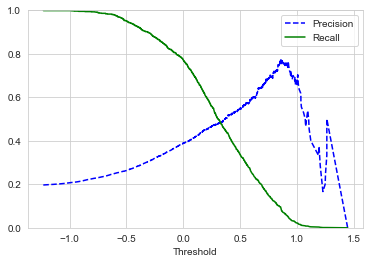

In [168]:
precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

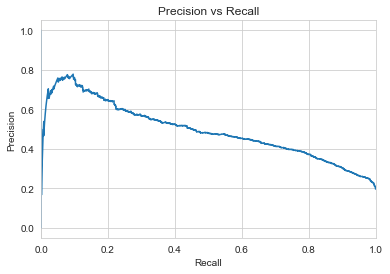

In [169]:
precision_vs_recall(precisions, recalls)
plt.margins(x=0)
plt.show()

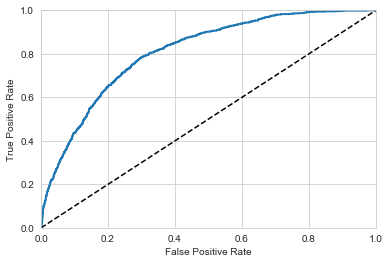

In [246]:
fpr2, tpr2, thresholds2 = roc_curve(y_train, y_scores)

plot_roc_curve(fpr2, tpr2)
plt.show()

In [171]:
roc_auc_score(y_train, y_scores)

0.8089829081197936

### SVC w/RBF Kernel

In [172]:
from sklearn.svm import SVR
svcrbf_clf = SVC(class_weight='balanced', probability=True, random_state=13)


svcrbf_clf.fit(X_train, y_train)

y_train_predsvc = cross_val_predict(svcrbf_clf, X_train, y_train, cv=10)
print('Accuracy Score: \n' ,metrics.accuracy_score(y_train, y_train_predsvc))
print('Confusion Matrix: \n' ,confusion_matrix(y_train, y_train_predsvc))
print('Cross Validation Score: \n' ,cross_val_score(svcrbf_clf, X_train, y_train, cv=10, scoring='accuracy'))
print('Classification Report: \n' ,classification_report(y_train, y_train_predsvc))

Accuracy Score: 
 0.7470859907631405
Confusion Matrix: 
 [[2662 1009]
 [ 141  735]]
Cross Validation Score: 
 [0.75604396 0.75384615 0.75164835 0.75604396 0.71868132 0.76703297
 0.71208791 0.74669604 0.77312775 0.73568282]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.73      0.82      3671
           1       0.42      0.84      0.56       876

    accuracy                           0.75      4547
   macro avg       0.69      0.78      0.69      4547
weighted avg       0.85      0.75      0.77      4547



Better but not by much. Let's play with some of the parameters to see if we can increase the score a bit.

In [173]:
svcrbf_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 13,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [174]:
#set the parameters
C = [0.1, 1, 10, 100, 1000]
gamma = [0.1, 1, 10, 100]

params = {"C": [0.1, 1, 10, 100, 1000],
          "gamma": [0.1, 1, 10, 100]}

In [175]:
from sklearn.model_selection import RandomizedSearchCV

svc_clf_random = RandomizedSearchCV(estimator = svcrbf_clf, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
svc_clf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   46.2s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight='balanced', coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=True, random_state=13,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [0.1, 1, 10, 100]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [176]:
svc_clf_random.best_estimator_.fit(X_train, y_train) 

y_train_predsvc = cross_val_predict(svc_clf_random.best_estimator_, X_train, y_train, cv=10)

print('Accuracy Score: \n' ,metrics.accuracy_score(y_train, y_train_predsvc))
print('Confusion Matrix: \n' ,confusion_matrix(y_train, y_train_predsvc))
print('Cross Validation Score: \n' ,cross_val_score(svcrbf_clf, X_train, y_train, cv=10, scoring='accuracy'))
print('Classification Report: \n' ,classification_report(y_train, y_train_predsvc))

Accuracy Score: 
 0.8706839674510667
Confusion Matrix: 
 [[3477  194]
 [ 394  482]]
Cross Validation Score: 
 [0.75604396 0.75384615 0.75164835 0.75604396 0.71868132 0.76703297
 0.71208791 0.74669604 0.77312775 0.73568282]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      3671
           1       0.71      0.55      0.62       876

    accuracy                           0.87      4547
   macro avg       0.81      0.75      0.77      4547
weighted avg       0.86      0.87      0.86      4547



Quite an improvement after tuning the model! However, our precision is still a little low for my liking.

In [177]:
y_scoressvc_clf = cross_val_predict(svc_clf_random.best_estimator_, X_train, y_train, cv=10, method='decision_function')

In [178]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scoressvc_clf)

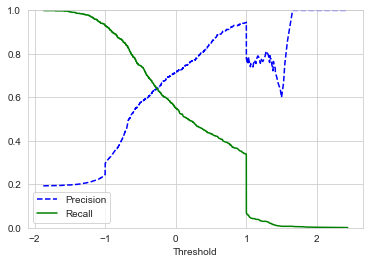

In [179]:
precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

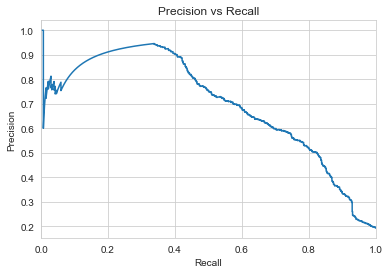

In [180]:
precision_vs_recall(precisions, recalls)
plt.margins(x=0)
plt.show()

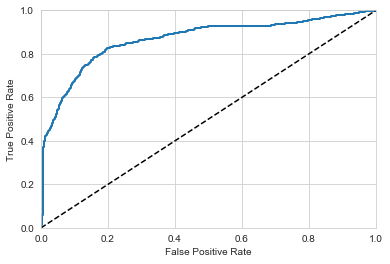

In [181]:
fpr3, tpr3, thresholds3 = roc_curve(y_train, y_scoressvc_clf)

plot_roc_curve(fpr3, tpr3)
plt.show()  

In [182]:
roc_auc_score(y_train, y_scoressvc_clf)

0.867065572567414

---

### Decision Tree

In [183]:
#train the decision tree classifier
from sklearn import tree
dtc = tree.DecisionTreeClassifier(class_weight='balanced', random_state=13)
     
dtc.fit(X_train, y_train)

y_train_preddt = cross_val_predict(dtc, X_train, y_train, cv=10)
print('Accuracy Score: \n' ,metrics.accuracy_score(y_train, y_train_preddt))
print('Confusion Matrix: \n' ,confusion_matrix(y_train, y_train_preddt))
print('Cross Validation Score: \n' ,cross_val_score(dtc, X_train, y_train, cv=10, scoring='accuracy'))
print('Classification Report: \n' ,classification_report(y_train, y_train_preddt))

Accuracy Score: 
 0.8478117440070376
Confusion Matrix: 
 [[3336  335]
 [ 357  519]]
Cross Validation Score: 
 [0.86373626 0.83956044 0.88351648 0.82857143 0.83956044 0.86593407
 0.82637363 0.84361233 0.84361233 0.84361233]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      3671
           1       0.61      0.59      0.60       876

    accuracy                           0.85      4547
   macro avg       0.76      0.75      0.75      4547
weighted avg       0.85      0.85      0.85      4547



We're getting there...

In [184]:
#predict proba
y_prob_tree = cross_val_predict(dtc, X_train, y_train, cv=10, method='predict_proba')

In [185]:
#ROC curve
y_scores_tree = y_prob_tree[:, 1]
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_train, y_scores_tree)

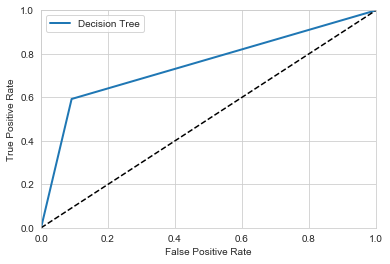

In [186]:
#ROC curve
plot_roc_curve(fpr_tree, tpr_tree, 'Decision Tree')
plt.legend()
plt.show()

In [187]:
#roc score
roc_auc_score(y_train, y_scores_tree)

0.7506049824056004

In [189]:
#dtc.feature_importances_

important_features_dict = {}
for x,i in enumerate(dtc.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print('Most important features: %s' %important_features_list)
print(dtc.feature_importances_)

Most important features: [0, 8, 7, 9, 5, 3, 2, 10, 6, 4, 1, 11, 12]
[0.26946604 0.05327574 0.07236117 0.07287291 0.05470997 0.07567225
 0.0568157  0.09508573 0.1116731  0.07731732 0.06075008 0.
 0.        ]


In [190]:
#plot the tree
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = dtc

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names= red_wine.columns,
    class_names=['Low', 'High'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

---

### Random Forest

In [191]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced', random_state=0)

rfc.fit(X_train, y_train)

y_train_predrf = cross_val_predict(rfc, X_train, y_train, cv=10)
print('Accuracy Score: \n' ,metrics.accuracy_score(y_train, y_train_predrf))
print('Confusion Matrix: \n' ,confusion_matrix(y_train, y_train_predrf))
print('Cross Validation Score: \n' ,cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy'))
print('Classification Report: \n' ,classification_report(y_train, y_train_predrf))

Accuracy Score: 
 0.8799208269188475
Confusion Matrix: 
 [[3554  117]
 [ 429  447]]
Cross Validation Score: 
 [0.87032967 0.86813187 0.90769231 0.87472527 0.87032967 0.88571429
 0.87692308 0.8722467  0.89647577 0.87665198]
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      3671
           1       0.79      0.51      0.62       876

    accuracy                           0.88      4547
   macro avg       0.84      0.74      0.77      4547
weighted avg       0.87      0.88      0.87      4547



These results are promising, the model is clearly doing what I need it to do.  

In [192]:
y_prob_forest = cross_val_predict(rfc, X_train, y_train, cv=10, method='predict_proba')

In [193]:
y_scores_forest = y_prob_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

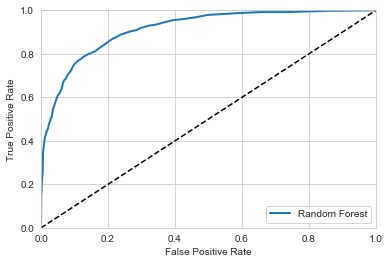

In [194]:
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend()
plt.show()

In [195]:
roc_auc_score(y_train, y_scores_forest)

0.914032793124937

In [196]:
rfc.feature_importances_

array([0.1786303 , 0.08574666, 0.06834319, 0.07386573, 0.06722487,
       0.06099526, 0.08173534, 0.07889633, 0.08982998, 0.10030633,
       0.10959976, 0.00282772, 0.00199854])

In [43]:
#Random Forest Classifier Hyperparameter Tuning

max_depth = [3, None]
n_estimators = [100, 200, 500, 1000]
min_samples_split = [1, 3, 10]
min_samples_leaf = [1, 3, 10]
bootstrap = [True, False]
criterion = ["gini", "entropy"]

params = {"max_depth": [3, None],
          'n_estimators': [100, 200, 500, 1000],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [198]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
         

In [199]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': None,
 'criterion': 'gini',
 'bootstrap': True}

In [200]:
rf_random.best_estimator_.fit(X_train, y_train)

y_train_predrf = cross_val_predict(rf_random.best_estimator_, X_train, y_train, cv=10)
print('Accuracy Score: \n' ,metrics.accuracy_score(y_train, y_train_predrf))
print('Confusion Matrix: \n' ,confusion_matrix(y_train, y_train_predrf))
print('Cross Validation Score: \n' ,cross_val_score(rf_random.best_estimator_, X_train, y_train, cv=10, scoring='accuracy'))
print('Classification Report: \n' ,classification_report(y_train, y_train_predrf))

Accuracy Score: 
 0.8847591818781614
Confusion Matrix: 
 [[3544  127]
 [ 397  479]]
Cross Validation Score: 
 [0.87472527 0.88351648 0.91428571 0.87472527 0.88351648 0.88791209
 0.88351648 0.87444934 0.89207048 0.87885463]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      3671
           1       0.79      0.55      0.65       876

    accuracy                           0.88      4547
   macro avg       0.84      0.76      0.79      4547
weighted avg       0.88      0.88      0.88      4547



In [201]:
y_prob_forest = cross_val_predict(rf_random.best_estimator_, X_train, y_train, cv=10, method='predict_proba')

In [202]:
y_scores_forest = y_prob_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

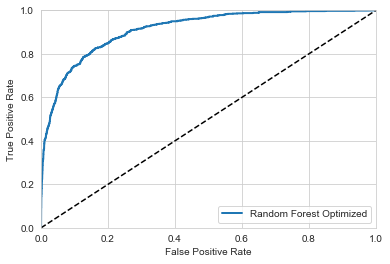

In [203]:
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest Optimized')
plt.legend()
plt.show()

In [204]:
roc_auc_score(y_train, y_scores_forest)

0.9128015272113033

---

### Extra Trees Classifier

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
etc = ExtraTreesClassifier(class_weight='balanced', random_state=0)

etc.fit(X_train, y_train)

y_train_predetc = cross_val_predict(etc, X_train, y_train, cv=10)
print('Accuracy Score: \n' ,metrics.accuracy_score(y_train, y_train_predetc))
print('Confusion Matrix: \n' ,confusion_matrix(y_train, y_train_predetc))
print('Cross Validation Score: \n' ,cross_val_score(etc, X_train, y_train, cv=10, scoring='accuracy'))
print('Classification Report: \n' ,classification_report(y_train, y_train_predetc))

Accuracy Score: 
 0.8849791071035847
Confusion Matrix: 
 [[3564  107]
 [ 416  460]]
Cross Validation Score: 
 [0.86813187 0.88571429 0.90769231 0.86373626 0.87912088 0.88131868
 0.89230769 0.88546256 0.89647577 0.88986784]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      3671
           1       0.81      0.53      0.64       876

    accuracy                           0.88      4547
   macro avg       0.85      0.75      0.78      4547
weighted avg       0.88      0.88      0.87      4547



Another promising model.

In [41]:
etc.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [44]:
from sklearn.model_selection import RandomizedSearchCV

etc_random = RandomizedSearchCV(estimator = etc, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
etc_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   32.7s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight='balanced',
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                  

In [45]:
etc_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': None,
 'criterion': 'gini',
 'bootstrap': True}

In [46]:
etc_random.best_estimator_.fit(X_train, y_train)

y_train_predetc = cross_val_predict(etc_random.best_estimator_, X_train, y_train, cv=10)
print('Accuracy Score: \n' ,metrics.accuracy_score(y_train, y_train_predetc))
print('Confusion Matrix: \n' ,confusion_matrix(y_train, y_train_predetc))
print('Cross Validation Score: \n' ,cross_val_score(etc_random.best_estimator_, X_train, y_train, cv=10, scoring='accuracy'))
print('Classification Report: \n' ,classification_report(y_train, y_train_predetc))

Accuracy Score: 
 0.8882779854849351
Confusion Matrix: 
 [[3548  123]
 [ 385  491]]
Cross Validation Score: 
 [0.87912088 0.89230769 0.91208791 0.87472527 0.87912088 0.89230769
 0.8989011  0.87665198 0.89207048 0.88546256]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      3671
           1       0.80      0.56      0.66       876

    accuracy                           0.89      4547
   macro avg       0.85      0.76      0.80      4547
weighted avg       0.88      0.89      0.88      4547



In [211]:
y_prob_etc = cross_val_predict(etc_random.best_estimator_, X_train, y_train, cv=10, method='predict_proba')

In [212]:
y_scores_etc = y_prob_etc[:, 1]
fpr_etc, tpr_etc, thresholds_etc = roc_curve(y_train, y_scores_etc)

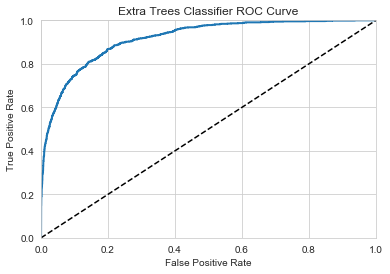

In [237]:
plot_roc_curve(fpr_etc, tpr_etc, 'Extra Trees Classifier')
plt.title('Extra Trees Classifier ROC Curve')
plt.show()

In [214]:
roc_auc_score(y_train, y_scores_etc)

0.9165522315470259

In [215]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_etc)

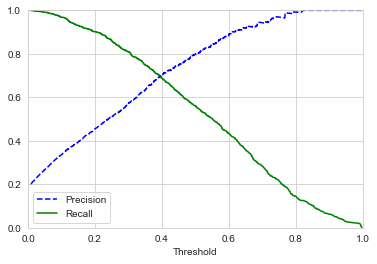

In [236]:
precision_recall_vs_threshold(precisions, recalls, thresholds)
x_max = 1.0
y_max = 1.0
plt.xlim([0, x_max])
plt.ylim([0, y_max])
plt.show()

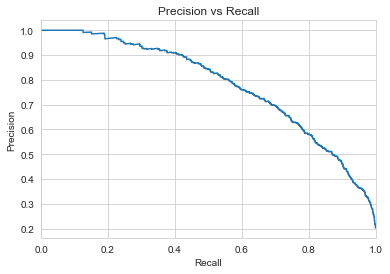

In [216]:
#can this be prettier?

precision_vs_recall(precisions, recalls)
plt.margins(x=0)
plt.show()

In [217]:
etc.feature_importances_  

array([0.18401718, 0.07966953, 0.07577663, 0.07467704, 0.06871093,
       0.06917104, 0.07874009, 0.07400627, 0.08995459, 0.07906791,
       0.1132006 , 0.00591218, 0.00709602])

In [218]:
X_train

array([[ 2.10070688,  0.15059062, -1.02590468, ..., -2.09199028,
         0.        ,  1.        ],
       [ 1.93315026,  0.50094651,  0.95009434, ..., -1.02178512,
         0.        ,  1.        ],
       [-1.08286889,  0.57101769, -0.95776678, ...,  0.2990377 ,
         0.        ,  1.        ],
       ...,
       [-0.74775565,  1.55201418,  1.9721628 , ...,  1.24732076,
         1.        ,  0.        ],
       [-0.2450858 ,  0.08051944, -0.07197412, ...,  0.16695542,
         0.        ,  1.        ],
       [ 0.84403223,  1.8322989 ,  3.19864495, ...,  2.0601348 ,
         1.        ,  0.        ]])

In [50]:
wine_features_df = pd.DataFrame({'Alcohol': X_train[:, 0], 'Citric Acid': X_train[:, 1], 'Sulphates': X_train[:, 2],
                                'pH': X_train[:, 3], 'Free Sulfur Dioxide': X_train[:, 4], 'Fixed Acidity': X_train[:, 5],
                                'Total Sulfur Dioxide': X_train[:, 6], 'Residual Sugar': X_train[:, 7], 
                                'Volatile Acidity': X_train[:, 8], 'Chlorides': X_train[:, 9], 'Density': X_train[:, 10], 
                                'White Wine': X_train[:, 11], 'Red Wine': X_train[:, 12]})


In [51]:
#how do I get this graph to work?

importances = etc.feature_importances_
indices = np.argsort(importances)[::-1]
feat_labels=wine_features_df.columns[0:]

for f in range(wine_features_df.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30,
                           feat_labels[indices[f]],
                           importances[indices[f]]))

 1) Alcohol                        0.184017
 2) Density                        0.113201
 3) Volatile Acidity               0.089955
 4) Citric Acid                    0.079670
 5) Chlorides                      0.079068
 6) Total Sulfur Dioxide           0.078740
 7) Sulphates                      0.075777
 8) pH                             0.074677
 9) Residual Sugar                 0.074006
10) Fixed Acidity                  0.069171
11) Free Sulfur Dioxide            0.068711
12) Red Wine                       0.007096
13) White Wine                     0.005912


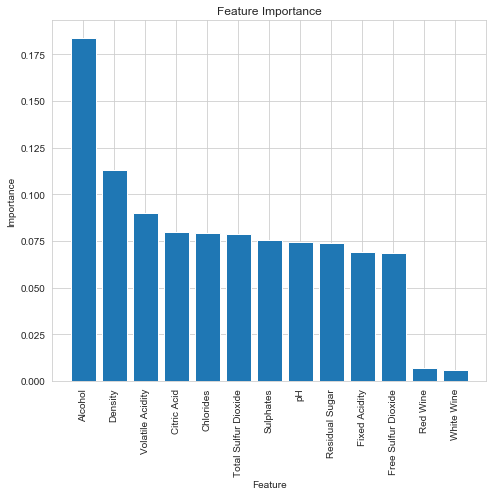

In [52]:
plt.figure(figsize=(7,7))
plt.title('Feature Importance')
plt.bar(range(wine_features_df.shape[1]),
       importances[indices])

plt.xticks(range(wine_features_df.shape[1]),
          feat_labels[indices], rotation=90)
plt.xlim([-1, wine_features_df.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

---

### Gradient Booster

In [239]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)
y_train_predgbc = cross_val_predict(gbc, X_train, y_train, cv=10)
print('Accuracy Score: \n' ,metrics.accuracy_score(y_train, y_train_predgbc))
print('Confusion Matrix: \n' ,confusion_matrix(y_train, y_train_predgbc))
print('Cross Validation Score: \n' ,cross_val_score(gbc, X_train, y_train, cv=10, scoring='accuracy'))
print('Classification Report: \n' ,classification_report(y_train, y_train_predgbc))

Accuracy Score: 
 0.8456124917528041
Confusion Matrix: 
 [[3511  160]
 [ 542  334]]
Cross Validation Score: 
 [0.84615385 0.84835165 0.85494505 0.83296703 0.85054945 0.85714286
 0.84395604 0.85022026 0.83480176 0.83700441]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      3671
           1       0.68      0.38      0.49       876

    accuracy                           0.85      4547
   macro avg       0.77      0.67      0.70      4547
weighted avg       0.83      0.85      0.83      4547



In [240]:
y_prob_gbc = cross_val_predict(gbc, X_train, y_train, cv=10, method='predict_proba')

In [241]:
y_scores_gbc = y_prob_gbc[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_train, y_scores_etc)

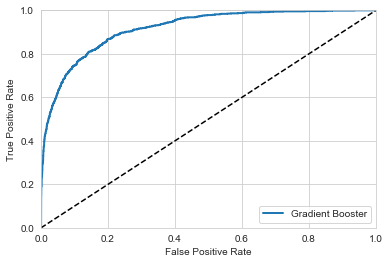

In [242]:
plot_roc_curve(fpr_gb, tpr_gb, 'Gradient Booster')
plt.legend()
plt.show()

In [243]:
roc_auc_score(y_train, y_scores_gbc)

0.8609883835914965

---

### Voting Classifier

Let's see if we can build an ensemble model that can outperform our individual models.

In [227]:
from sklearn.ensemble import VotingClassifier

named_estimators = [
    ("random_forest_clf", rf_random.best_estimator_),
    ("extra_trees_clf", etc_random.best_estimator_),
    ("svm_clf", svc_clf_random.best_estimator_)]
    

voting_clf = VotingClassifier(named_estimators, voting = "soft")
voting_clf.fit(X_train, y_train)
  
y_train_predvclf = cross_val_predict(voting_clf, X_train, y_train, cv=10)
print('Accuracy Score: \n' ,metrics.accuracy_score(y_train, y_train_predvclf))
print('Confusion Matrix: \n', confusion_matrix(y_train, y_train_predvclf))
print('Cross Validation Score: \n', cross_val_score(voting_clf, X_train, y_train, cv=10, scoring='accuracy'))
print('Classification Report: \n', classification_report(y_train, y_train_predvclf))

Accuracy Score: 
 0.8819001539476578
Confusion Matrix: 
 [[3560  111]
 [ 426  450]]
Cross Validation Score: 
 [0.86813187 0.87692308 0.92087912 0.86813187 0.86813187 0.89010989
 0.87252747 0.87665198 0.89647577 0.88105727]
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      3671
           1       0.80      0.51      0.63       876

    accuracy                           0.88      4547
   macro avg       0.85      0.74      0.78      4547
weighted avg       0.88      0.88      0.87      4547



Promising... but the extra trees classifier model is still our strongest performer in terms of overall precision and accuracy. 

In [228]:
y_prob_vclf = cross_val_predict(voting_clf, X_train, y_train, cv=10, method='predict_proba')

In [229]:
y_scores_vclf = y_prob_vclf[:, 1]
fpr_vc, tpr_vc, thresholds_vc = roc_curve(y_train, y_scores_vclf)

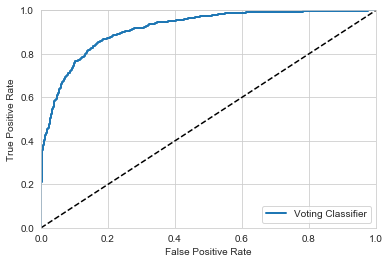

In [230]:
plot_roc_curve(fpr_vc, tpr_vc, 'Voting Classifier')
plt.legend()
plt.show()

In [231]:
roc_auc_score(y_train, y_scores_gbc)

0.8610141936864154

---

### Model Evaluation

                Models  Accuracies
0         Bernoulli NB    0.738949
1  Logistic Regression    0.720695
2           Linear SVC    0.722015
3              SVC RBF    0.870684
4        Decision Tree    0.847812
5        Random Forest    0.884759
6          Extra Trees    0.888278
7     Gradient Booster    0.845612
8    Voting Classifier    0.881900


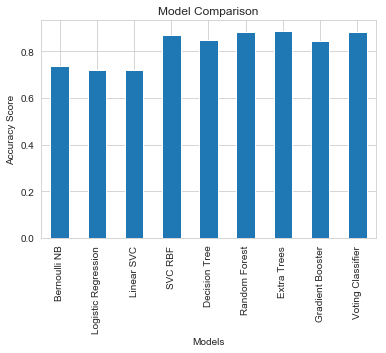

In [249]:
modelnames = ['Bernoulli NB', 'Logistic Regression', 'Linear SVC', 'SVC RBF', 'Decision Tree', 'Random Forest', 'Extra Trees',
             'Gradient Booster', 'Voting Classifier']

model_classifiers = [bnb, log_r, svclin_clf, svc_clf_random.best_estimator_, dtc, rf_random.best_estimator_, etc, gbc, voting_clf]
conclusion = pd.DataFrame({'Models': modelnames,
                           'Accuracies': [metrics.accuracy_score(y_train, y_train_predbnb), metrics.accuracy_score(y_train , y_train_predlog),
                                          metrics.accuracy_score(y_train, y_train_pred), metrics.accuracy_score(y_train, y_train_predsvc),
                                          metrics.accuracy_score(y_train, y_train_preddt), metrics.accuracy_score(y_train, y_train_predrf),
                                         metrics.accuracy_score(y_train, y_train_predetc), metrics.accuracy_score(y_train, y_train_predgbc),
                                         metrics.accuracy_score(y_train, y_train_predvclf)]})

print(conclusion)

conclusion.plot(kind='bar',x='Models',y='Accuracies')
plt.title('Model Comparison')
plt.ylabel('Accuracy Score')
plt.legend().remove()

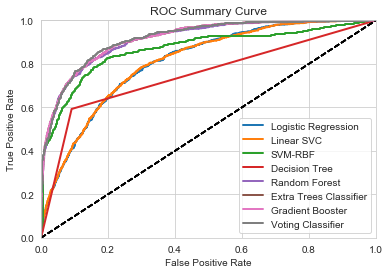

In [248]:
plot_roc_curve(fpr1, tpr1, 'Logistic Regression')
plot_roc_curve(fpr2, tpr2, 'Linear SVC')
plot_roc_curve(fpr3, tpr3, 'SVM-RBF')
plot_roc_curve(fpr_tree, tpr_tree, 'Decision Tree')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plot_roc_curve(fpr_etc, tpr_etc, 'Extra Trees Classifier')
plot_roc_curve(fpr_gb, tpr_gb, 'Gradient Booster')
plot_roc_curve(fpr_vc, tpr_vc, 'Voting Classifier')
plt.title('ROC Summary Curve')

plt.legend()
plt.show()

### Introduce Test Data into the Final Model

In [146]:
final_model = etc_random.best_estimator_

In [147]:
X_test_prepared = preprocess_pipeline.transform(X_test)

In [148]:
final_predictions = final_model.predict(X_test_prepared)
print('Accuracy Score: \n' ,metrics.accuracy_score(y_test, final_predictions))
print('Confusion Matrix: \n' ,confusion_matrix(y_test, final_predictions))
print('Classification Report: \n' ,classification_report(y_test, final_predictions))

Accuracy Score: 
 0.882051282051282
Confusion Matrix: 
 [[1510   39]
 [ 191  210]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1549
           1       0.84      0.52      0.65       401

    accuracy                           0.88      1950
   macro avg       0.87      0.75      0.79      1950
weighted avg       0.88      0.88      0.87      1950



In [149]:
final_model.feature_importances_

array([0.19367559, 0.07600859, 0.07300362, 0.07539838, 0.06868143,
       0.06768147, 0.07878634, 0.07326195, 0.09059595, 0.07870233,
       0.10912714, 0.00763566, 0.00744154])

In [150]:
y_prob_final = cross_val_predict(final_model, X_test_prepared, y_test, cv=10, method='predict_proba')

In [151]:
y_scores_final = y_prob_final[:, 1]
fpr_etc, tpr_etc, thresholds_etc = roc_curve(y_test, y_scores_final)

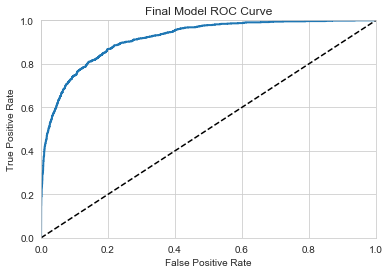

In [238]:
plot_roc_curve(fpr_etc, tpr_etc, 'Final Model')
plt.title('Final Model ROC Curve')
plt.show()

Of all the models built, the tuned Extra Trees Classifier gave the best results in terms of precision and overall accuracy score. It is clear that the model wasn't overfitting the training data given our accuracy scores between training and test are so similar, the cross validation scores also confirm this. Feature importances were successfully extracted from the models (where applicable) which will be discussed in the presentation for this capstone. 

Text(16,0.5,'Actual')

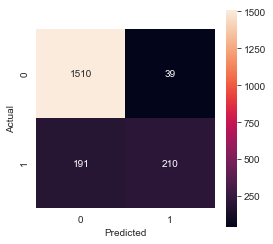

In [153]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = metrics.confusion_matrix(y_test, final_predictions)
ax = sns.heatmap(cm, annot=True, square=True, fmt='g')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

In [154]:
roc_auc_score(y_test, y_scores_final)

0.8834112266139041